<a href="https://colab.research.google.com/github/hnioua/Gene-Expression-Analysis-in-Colorectal-Cancer-Using-Machine-Learning/blob/main/Copie_de_Activit%C3%A9_pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# 1) Préparation du dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Imports the dataset
df = pd.read_csv('colon_cancer.csv', sep=';')
df

,id_sample,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,...,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4,tissue_status
0,EPSM-COLON-0001,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,...,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413,normal
1,EPSM-COLON-0002,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,...,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531,normal
2,EPSM-COLON-0003,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,...,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491,normal
3,EPSM-COLON-0004,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,...,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796,normal
4,EPSM-COLON-0005,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,...,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,EPSM-COLON-0800,6.019963,3.089364,4.393486,5.947781,7.124598,6.476207,3.511464,3.360520,2.954864,...,4.643061,4.632634,4.670141,4.571678,2.864645,2.336317,6.923562,2.710594,2.507989,tumoral
800,EPSM-COLON-0801,3.691606,2.118164,4.794787,4.746829,5.493405,5.127365,3.516129,1.701237,2.771962,...,4.695878,1.800088,7.647284,1.340236,3.063140,3.410137,3.856952,1.491817,6.493643,tumoral
801,EPSM-COLON-0802,3.035242,2.495383,4.438451,5.916828,7.155135,5.556266,1.192243,1.169104,1.038835,...,4.886197,3.624820,3.912746,2.806374,3.170815,0.775487,4.952383,1.960087,2.809510,tumoral
802,EPSM-COLON-0803,3.021057,3.581192,4.822947,5.694947,6.789079,6.570513,1.404105,3.390414,2.653714,...,4.980576,4.088197,3.945064,3.426452,1.526074,4.175287,8.242634,2.225967,1.842766,tumoral


In [ ]:
len(df)

804

In [ ]:
print(df.columns)

Index(['id_sample', 'ADH1C', 'DHRS11', 'UGP2', 'SLC7A5', 'CTSS', 'DAO',
       'NIBAN1', 'PRUNE2', 'FOXF2', 'TENT5C', 'KLF10', 'FABP1', 'RPSAP19',
       'NCAPH', 'TPM1', 'PLA2G12B', 'PLAAT4', 'IGLV8-61', 'GSS', 'L1TD1',
       'RNF186', 'HES2', 'MXRA8', 'SOX18', 'NDFIP2', 'SIAE', 'NEURL1B',
       'DDIT4', 'TRPM4', 'RETREG1', 'OTULINL', 'CPVL', 'SAMD9', 'ANKRD40CL',
       'EPN3', 'CRYBG2', 'GIPC2', 'P3H2', 'STEAP3', 'THNSL2', 'TRAPPC14',
       'RHBDL2', 'RPP25', 'SEMA4C', 'RNF43', 'EPS8L1', 'TOR4A', 'PAQR5',
       'SIDT1', 'ESRP1', 'SYTL2', 'BSPRY', 'CDHR2', 'ERRFI1', 'CLIC5', 'PLLP',
       'GAL', 'CRYL1', 'YBX2', 'ANGPTL4', 'tissue_status'],
      dtype='object')


Le dataset "Gene Expression of Colon Cancer" disponible sur Kaggle contient des données sur l'expression de plusieurs gènes dans des échantillons de tissus, avec un total de 804 observations.

1. Description des Colonnes :





* id_sample : Identifiant unique de chaque échantillon.

* ADH1C, DHRS11, UGP2, ... : Ces colonnes représentent l'expression de différents gènes.

* tissue_status : Indique si l'échantillon provient d'un tissu cancéreux ou sain.

2. Objectif du Dataset :

Ce dataset permet d'analyser l'expression des gènes et d'identifier des biomarqueurs potentiels pour le diagnostic ou le traitement du cancer du côlon. Il peut être utilisé pour des études de classification afin de différencier les tissus cancéreux des tissus sains en fonction de l'expression génétique.

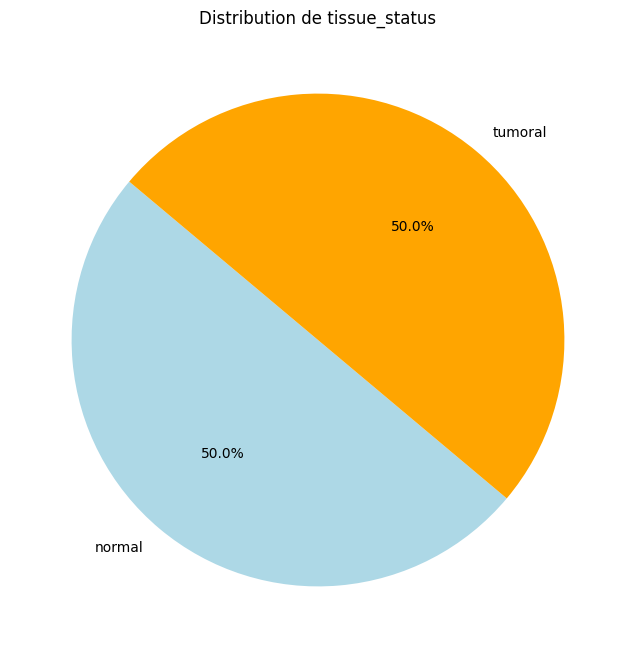

In [ ]:
# Compter les occurrences des différentes catégories de la colonne 'tissue_status'
value_counts = df['tissue_status'].value_counts()

# Tracer le pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange'])
plt.title(f'Distribution de tissue_status')  # Correction ici : suppression des {}
plt.show()

* L'analyse de cette distribution montre que les classes "normal" et
"tumoral" sont équilibrées, chacune représentant 50 % des données.
* Cela signifie qu'il n'y a pas de déséquilibre dans le dataset en ce qui concerne la variable tissue_status.
* Cet équilibre peut être avantageux pour l'entraînement de modèles de classification, car il évite les biais liés à une sous-représentation d'une classe par rapport à l'autre.

In [ ]:
# Defining X and y
X = df.drop(['tissue_status' , 'id_sample'],axis=1)
y = df.tissue_status

In [ ]:
X

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,SYTL2,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4
0,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,6.350919,...,3.951686,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413
1,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,4.686086,...,4.269728,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531
2,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,4.281126,...,4.050933,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491
3,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,4.821072,...,4.357246,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796
4,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,5.181036,...,1.906739,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,6.019963,3.089364,4.393486,5.947781,7.124598,6.476207,3.511464,3.360520,2.954864,1.708999,...,3.845019,4.643061,4.632634,4.670141,4.571678,2.864645,2.336317,6.923562,2.710594,2.507989
800,3.691606,2.118164,4.794787,4.746829,5.493405,5.127365,3.516129,1.701237,2.771962,2.215480,...,3.309359,4.695878,1.800088,7.647284,1.340236,3.063140,3.410137,3.856952,1.491817,6.493643
801,3.035242,2.495383,4.438451,5.916828,7.155135,5.556266,1.192243,1.169104,1.038835,2.833854,...,2.081777,4.886197,3.624820,3.912746,2.806374,3.170815,0.775487,4.952383,1.960087,2.809510
802,3.021057,3.581192,4.822947,5.694947,6.789079,6.570513,1.404105,3.390414,2.653714,3.190606,...,2.137942,4.980576,4.088197,3.945064,3.426452,1.526074,4.175287,8.242634,2.225967,1.842766


In [ ]:
# Vérifier si des valeurs manquantes existent dans la matrice
missing_values_X = X.isna().sum().sum()
print("Nombre de valeurs manquantes :", missing_values_X)

Nombre de valeurs manquantes : 0


In [ ]:
y

,tissue_status
0,normal
1,normal
2,normal
3,normal
4,normal
...,...
799,tumoral
800,tumoral
801,tumoral
802,tumoral


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convertir les étiquettes en valeurs 0 et 1
le = LabelEncoder()
y = le.fit_transform(y)  # 'normal' -> 0, 'tumoral' -> 1
y = pd.DataFrame(y, columns=['tissue_status'])
y

,tissue_status
0,0
1,0
2,0
3,0
4,0
...,...
799,1
800,1
801,1
802,1


In [ ]:
# Vérifier si des valeurs manquantes existent dans la matrice
missing_values_y = y.isna().sum().sum()
print("Nombre de valeurs manquantes :", missing_values_y)

Nombre de valeurs manquantes : 0


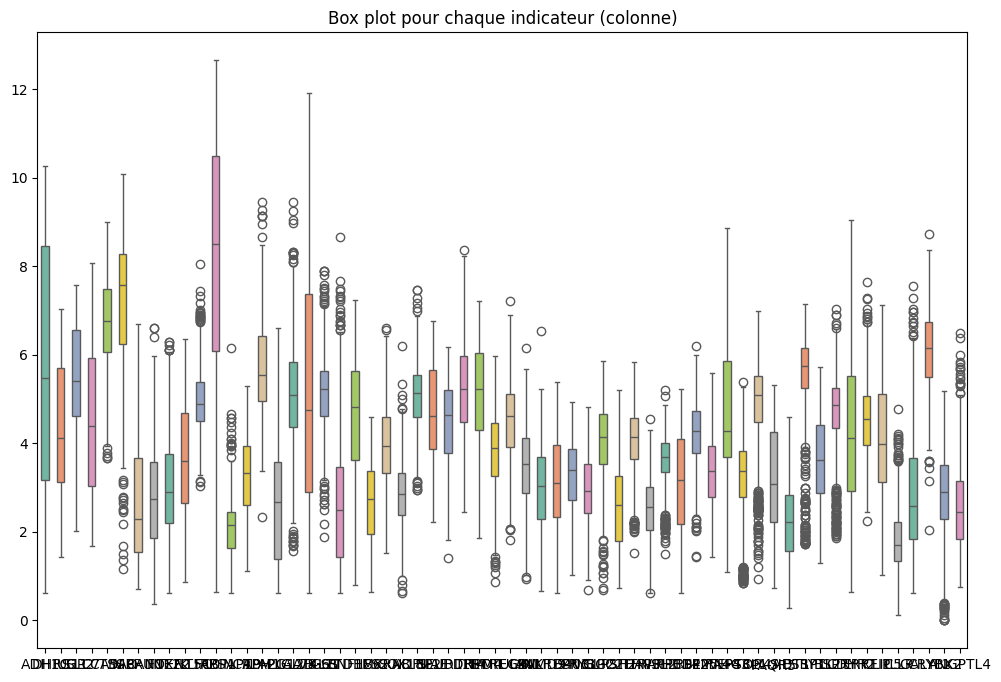

In [ ]:
# Créer un box plot pour chaque colonne
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, width=0.5, palette="Set2")

# Ajouter un titre
plt.title("Box plot pour chaque indicateur (colonne)")

# Afficher le graphique
plt.show()

In [ ]:
outliers_count = sum(((X < (X.quantile(0.25) - 1.5 * (X.quantile(0.75) - X.quantile(0.25)))) |
                      (X > (X.quantile(0.75) + 1.5 * (X.quantile(0.75) - X.quantile(0.25))))).sum())

print(f"Nombre total de valeurs aberrantes : {outliers_count}")

Nombre total de valeurs aberrantes : 624


In [ ]:
statistiques = X.describe()  # Cette méthode donne un résumé statistique
statistiques

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,SYTL2,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,...,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,5.588943,4.354817,5.557694,4.513570,6.717535,7.218184,2.737937,2.806573,3.064394,3.658318,...,3.599294,4.682718,4.225014,4.575397,4.097244,1.823268,2.822931,6.096634,2.801603,2.596452
std,2.889901,1.431179,1.150565,1.614450,1.077821,1.411969,1.466906,1.243826,1.191486,1.258059,...,1.054504,0.917027,1.656088,0.859138,1.276589,0.721587,1.338349,0.840122,1.011971,1.000962
min,0.610504,1.427079,2.027201,1.685024,3.668691,1.164886,0.716737,0.368200,0.610504,0.858074,...,1.286220,1.868389,0.637047,2.250347,1.015235,0.118945,0.610504,2.031471,0.000000,0.757246
25%,3.174250,3.118844,4.611060,3.030022,6.065937,6.241714,1.550382,1.864561,2.198244,2.655091,...,2.878356,4.349295,2.921069,3.958903,3.131267,1.337715,1.840902,5.489589,2.277491,1.824823
50%,5.467024,4.125990,5.412204,4.382953,6.762908,7.578782,2.297732,2.741509,2.900393,3.605686,...,3.613342,4.869313,4.116251,4.537381,3.975276,1.689671,2.591044,6.150297,2.905605,2.442378
75%,8.444756,5.696566,6.556969,5.918848,7.485487,8.263561,3.669509,3.574304,3.752899,4.686086,...,4.417632,5.249372,5.507864,5.070072,5.118110,2.211967,3.661012,6.728052,3.505721,3.139738
max,10.263846,7.022241,7.571114,8.059430,8.990703,10.079135,6.682541,6.591924,6.276628,6.350919,...,5.713776,7.029946,9.045672,7.647284,7.129499,4.763212,7.545757,8.723941,5.169059,6.493643


In [ ]:
# Calculer la moyenne de chaque colonne
means = X.mean()

# Centrer le DataFrame en soustrayant la moyenne de chaque colonne
X_centered = X - means

# Afficher le DataFrame centré
X_centered

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,SYTL2,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4
0,3.611001,1.735237,1.504818,-0.649317,1.151833,1.246949,-1.563272,-1.831487,-0.035399,2.692601,...,0.352391,0.845653,-0.724284,-1.681637,1.033499,-0.338158,-0.992447,0.283299,1.117690,0.434960
1,2.178675,1.673168,0.761124,-1.443990,-0.307201,0.941630,3.221477,-1.181055,-0.079765,1.027768,...,0.670433,0.989070,0.433775,0.139977,1.340860,0.308197,-0.725775,0.766539,-2.478774,1.382079
2,2.329962,1.531131,1.360048,-1.325314,1.198014,0.786009,-1.177551,-0.426664,-0.134632,0.622808,...,0.451638,-0.086639,1.424362,-0.527498,2.483695,-0.376060,1.068012,0.113070,0.472804,1.118039
3,3.464611,1.673168,1.523391,-2.156047,-1.059809,0.786009,0.811050,0.453458,0.249435,1.162754,...,0.757952,-0.547657,1.212093,-0.038016,0.518019,-0.818814,-0.982030,0.677429,0.518923,0.484344
4,0.438879,1.436440,0.379990,-0.375904,-0.898536,0.837883,0.570008,2.402301,1.127301,1.522718,...,-1.692555,-1.008675,2.061168,0.139977,0.335166,-1.664073,0.683629,0.053663,-2.340419,2.543853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.431020,-1.265453,-1.164208,1.434210,0.407063,-0.741977,0.773526,0.553947,-0.109530,-1.949320,...,0.245725,-0.039657,0.407619,0.094745,0.474435,1.041377,-0.486615,0.826929,-0.091009,-0.088463
800,-1.897337,-2.236652,-0.762907,0.233258,-1.224129,-2.090819,0.778191,-1.105336,-0.292433,-1.442838,...,-0.289936,0.013159,-2.424926,3.071888,-2.757007,1.239871,0.587205,-2.239682,-1.309786,3.897191
801,-2.553700,-1.859433,-1.119243,1.403258,0.437601,-1.661919,-1.545695,-1.637469,-2.025559,-0.824465,...,-1.517518,0.203479,-0.600195,-0.662651,-1.290869,1.347547,-2.047444,-1.144250,-0.841516,0.213057
802,-2.567885,-0.773624,-0.734747,1.181376,0.071544,-0.647672,-1.333832,0.583840,-0.410680,-0.467712,...,-1.461353,0.297858,-0.136817,-0.630332,-0.670792,-0.297195,1.352356,2.146001,-0.575636,-0.753687


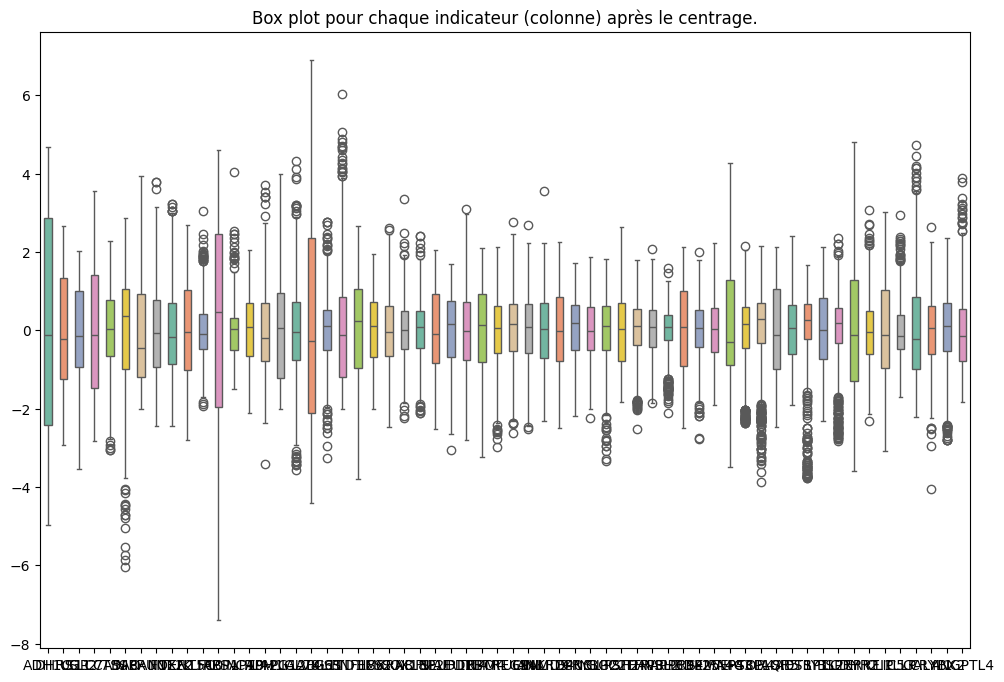

In [ ]:
# Créer un box plot pour chaque colonne
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_centered, width=0.5, palette="Set2")

# Ajouter un titre
plt.title("Box plot pour chaque indicateur (colonne) après le centrage.")

# Afficher le graphique
plt.show()

In [ ]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_centered,y,test_size=0.25,random_state=42)

# 2) Algorithmes Utilisés (espaces d'hypothèses)

---



Nous avons testé plusieurs algorithmes de classification en explorant leurs espaces d'hypothèses :

* Régression Logistique : Modèle linéaire simple utilisé pour la classification binaire. L'espace d'hypothèses est constitué d'hyperplans linéaires séparant les classes.

* SVM (Support Vector Machine) : Algorithme efficace pour la séparation des classes dans des espaces de grande dimension. L'espace d'hypothèses inclut des frontières de décision optimisées via des marges maximales.

* k-NN (k-Nearest Neighbors) : Basé sur la proximité des points pour effectuer la classification. L'espace d'hypothèses dépend de la structure locale des données et de la valeur de k.

* Arbre de Décision : Modèle basé sur une structure arborescente pour prendre des décisions. L'espace d'hypothèses est défini par un ensemble de règles de partitionnement des données.

* Forêt Aléatoire : Ensemble d'arbres de décision pour améliorer la robustesse et réduire le surapprentissage. L'espace d'hypothèses est plus large grâce à la combinaison de plusieurs modèles indépendants

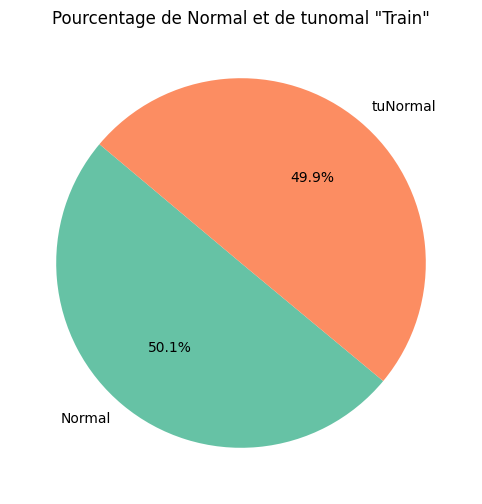

In [ ]:
# Calculer les pourcentages de chaque classe 'colon_cancer'
total_samples = len(y_train)
diabetes_counts = y_train.value_counts()
percentage_diabetes = (diabetes_counts / total_samples) * 100

# Données à représenter
labels = ['Normal', 'tuNormal']
sizes = percentage_diabetes.values

# Création du cercle
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=140)

# Afficher les pourcentages
plt.title('Pourcentage de Normal et de tunomal "Train"')

plt.show()

* les données d'entraînement sont équilibrées avec une
répartition presque égale entre les classes "Normal" et "tuNormal" (50.1 % vs 49.9 %). Il n'est donc pas nécessaire d'appliquer des techniques de rééquilibrage comme `l'oversampling` ou `l'undersampling`.

In [ ]:
from scipy.stats import pearsonr
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

* Modèle de régression logistique pour classer les échantillons sur toutes ensembles de données avant la `**sélection des features.**`




In [ ]:
# Modèle de régression logistique
model = LogisticRegression(max_iter=500)

# Entraîner le modèle avec les features sélectionnées
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle avec toutes les variables sélectionnées : {accuracy:.4f}")

from sklearn.model_selection import cross_val_score

# Évaluer la précision sur les données d'entraînement
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Précision sur les données d'entraînement : {train_accuracy:.4f}")
print(f"Précision sur les données de test : {test_accuracy:.4f}")

# Vérification avec validation croisée (5-fold)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Précision moyenne avec validation croisée : {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Précision du modèle avec toutes les variables sélectionnées : 1.0000
Précision sur les données d'entraînement : 1.0000
Précision sur les données de test : 1.0000
Précision moyenne avec validation croisée : 1.0000 ± 0.0000


* Les performances sur l'entraînement et le test sont très proches, et la validation croisée donne une précision similaire. Cela indique qu'il n'y a pas de surapprentissage (overfitting), car le modèle généralise bien sur des données non vues.



# Ajout de bruit:
* L'ajout de bruit permet d'évaluer la robustesse du modèle. Si la précision chute fortement après l'ajout de bruit, cela signifie que le modèle dépend trop des caractéristiques originales et peut manquer de généralisation.

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Ajouter du bruit aux features
X_noisy = X_centered + np.random.normal(0, 2, X_centered.shape)
X_noisy

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,SYTL2,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4
0,-1.067482,0.799882,2.700679,0.883291,3.385528,1.123643,-1.396865,-3.063207,1.209997,3.897416,...,0.542579,6.528247,0.462137,0.432202,2.287637,2.363594,-1.262282,2.077728,0.330528,-0.497503
1,6.209039,3.366485,0.498352,0.341477,-1.833645,-2.151758,5.194566,-3.496760,-2.196928,0.499658,...,-1.129010,0.031663,1.996154,1.236527,1.985313,2.350087,-2.712604,3.168697,-2.806131,1.434668
2,1.140357,2.033809,2.881442,-1.144604,3.327123,0.636422,0.039278,-1.872077,-1.051320,0.307695,...,0.266946,-2.364688,0.462186,0.636263,8.245263,-1.936718,2.535306,0.924976,-0.419564,-1.476112
3,2.062678,7.939854,-0.786836,0.142691,-1.589536,-2.032608,0.973108,-2.692262,1.215121,0.717236,...,-1.811480,-4.801657,1.119907,2.697026,2.353007,-3.298874,-3.598390,-0.047342,3.118740,4.676532
4,-0.824451,-0.794415,1.660889,2.305715,-3.390598,-0.436102,-0.303885,2.289048,2.273204,3.401562,...,-3.850498,-0.905121,1.556920,5.729337,-1.723138,-1.585840,0.041065,3.233904,0.002035,2.018822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,3.813446,-2.229489,1.367798,4.328717,0.323565,-3.507070,-1.687607,3.098818,-0.325536,-0.681579,...,-1.370904,-3.278697,-3.304937,-2.184460,0.093255,0.829181,-0.396256,1.272553,-1.221144,0.395534
800,-4.085992,-1.069660,-1.751378,-0.857162,-1.732896,-6.245851,2.892118,-1.744779,2.789725,-3.910292,...,1.068912,1.128722,-0.879991,0.607883,-3.023309,0.375622,0.838291,-1.406063,0.655590,3.470645
801,0.346245,-3.102644,-3.428622,-1.263249,-1.618064,-1.431368,-1.628564,-3.537848,0.443042,-1.168892,...,1.204111,1.562560,0.082284,-0.203516,-1.113303,3.287902,-3.008309,-1.176638,2.579423,3.090634
802,-1.057257,1.854782,-2.159594,0.861833,-1.082142,1.294350,-2.171116,-0.714579,-2.322220,-1.377704,...,-2.283798,3.023873,0.314654,0.273817,0.699048,0.841206,3.004032,1.068608,-2.012749,1.609757


In [ ]:
# Re-diviser en train/test
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X_noisy, y, test_size=0.25, random_state=42)

In [ ]:
# Ré-entraîner et tester
model.fit(X_trainB, y_trainB)
y_predB = model.predict(X_testB)
accuracyB = accuracy_score(y_testB, y_predB)
print(f"Précision du modèle avec bruit : {accuracyB:.4f}")

# Évaluer la précision sur les données d'entraînement
train_accuracyBruit = model.score(X_trainB, y_trainB)
test_accuracyBruit = model.score(X_testB, y_testB)

print(f"Précision sur les données d'entraînement : {train_accuracyBruit:.4f}")
print(f"Précision sur les données de test : {test_accuracyBruit:.4f}")

# Vérification avec validation croisée (5-fold)
cv_scoresB = cross_val_score(model, X_trainB, y_trainB, cv=5)
print(f"Précision moyenne avec validation croisée : {cv_scoresB.mean():.4f} ± {cv_scoresB.std():.4f}")

Précision du modèle avec bruit : 0.9353
Précision sur les données d'entraînement : 0.9950
Précision sur les données de test : 0.9353
Précision moyenne avec validation croisée : 0.9469 ± 0.0164


* Même avec du bruit, le modèle maintient une bonne précision (0.
9379), montrant qu'il ne souffre pas d’overfitting. Il reste performant mais légèrement sensible aux perturbations.

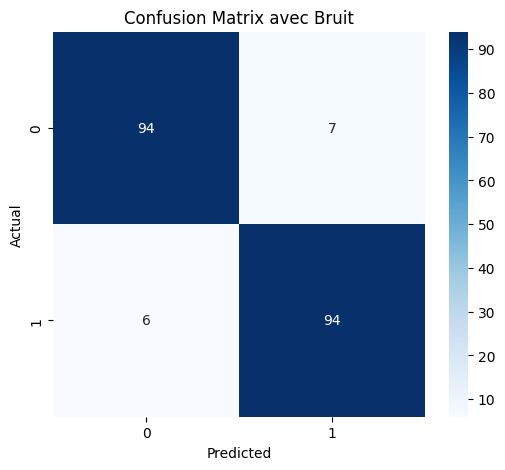

In [ ]:
# Matrice de confusion
cmB = confusion_matrix(y_testB, y_predB)

# Visualisation de la matrice de confusion
plt.figure(figsize=(6,5))
sns.heatmap(cmB, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix avec Bruit')
plt.show()

In [ ]:
# Calcul des métriques
precisionB = precision_score(y_testB, y_predB, average='weighted')
recallB = recall_score(y_testB, y_predB, average='weighted')
f1B = f1_score(y_testB, y_predB, average='weighted')

print(f"Précision : {precisionB:.4f}")
print(f"Rappel : {recallB:.4f}")
print(f"F1-Score : {f1B:.4f}")

Précision : 0.9354
Rappel : 0.9353
F1-Score : 0.9353


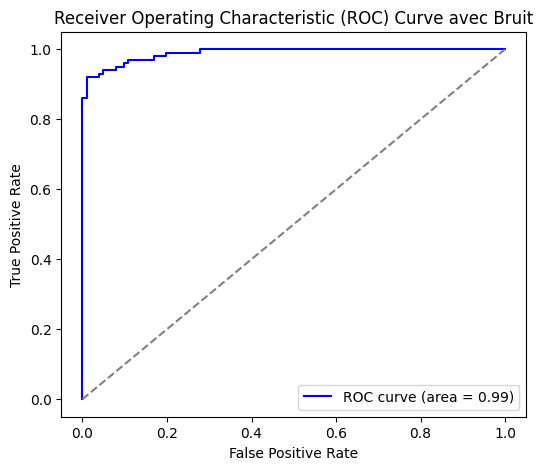

In [ ]:
# Courbe ROC (si applicable)
if hasattr(model, "predict_proba"):
    y_probB = model.predict_proba(X_testB)[:, 1]  # Probabilités de la classe positive
    fprB, tprB, _ = roc_curve(y_testB, y_probB)
    roc_aucB = auc(fprB, tprB)

    # Tracer la courbe ROC
    plt.figure(figsize=(6,5))
    plt.plot(fprB, tprB, color='blue', label=f'ROC curve (area = {roc_aucB:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonale aléatoire
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve avec Bruit')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("⚠️ Le modèle ne supporte pas predict_proba(), impossible d'afficher la courbe ROC.")

# La sélection des caractéristiques


Pour la sélection des caractéristiques dans un modèle de machine learning, l'objectif est d'identifier les variables (ou caractéristiques) les plus importantes pour la prédiction. La sélection des caractéristiques permet de réduire la complexité du modèle, d'améliorer la performance et de diminuer le risque de surapprentissage.


***1. Methode de Variance Threshold***

---




* Calculate feature variances



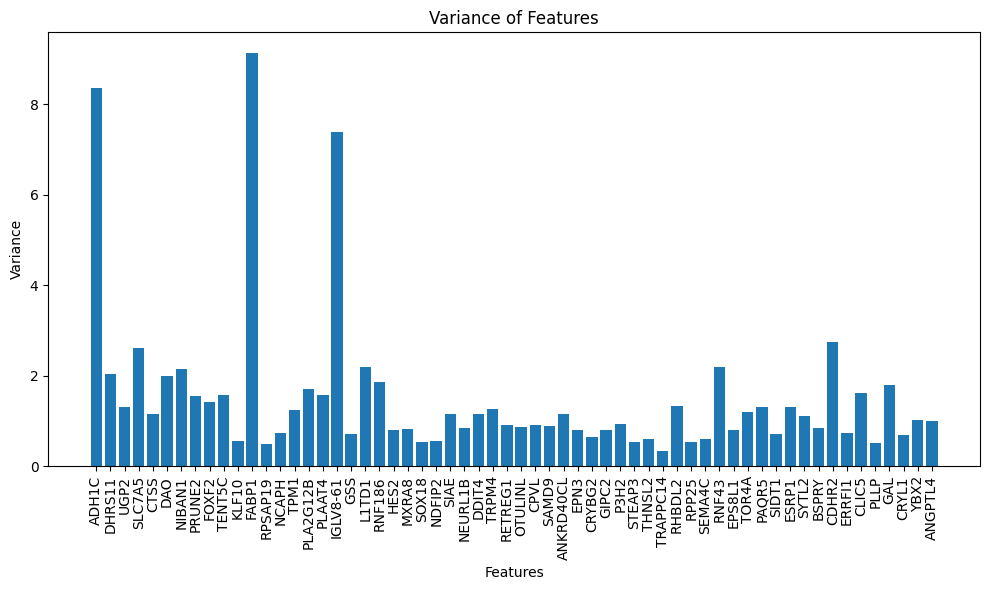

In [ ]:
# Calculate feature variances
feature_variances = X.var(axis=0)

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(feature_variances.index, feature_variances.values)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance of Features")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

* la variance des différentes caractéristiques (gènes) dans le dataset. Une variance élevée signifie que l'expression du gène varie beaucoup entre les échantillons, ce qui peut indiquer un potentiel discriminant entre les tissus sains et cancéreux.
* En revanche, les gènes avec une faible variance ont peu de variation et pourraient être moins utiles pour la classification. On peut envisager de sélectionner uniquement les gènes avec une variance élevée pour améliorer la

Threshold: 0.10 | Features: 60 | Accuracy: 1.0000
Threshold: 0.60 | Features: 52 | Accuracy: 1.0000
Threshold: 1.10 | Features: 30 | Accuracy: 0.9975
Threshold: 1.60 | Features: 14 | Accuracy: 0.9950
Threshold: 2.10 | Features: 8 | Accuracy: 0.9875
Threshold: 2.60 | Features: 5 | Accuracy: 0.9727
Threshold: 3.10 | Features: 3 | Accuracy: 0.8681
Threshold: 3.60 | Features: 3 | Accuracy: 0.8681
Threshold: 4.10 | Features: 3 | Accuracy: 0.8681
Threshold: 4.60 | Features: 3 | Accuracy: 0.8681
Threshold: 5.10 | Features: 3 | Accuracy: 0.8681
Threshold: 5.60 | Features: 3 | Accuracy: 0.8681
Threshold: 6.10 | Features: 3 | Accuracy: 0.8681
Threshold: 6.60 | Features: 3 | Accuracy: 0.8681
Threshold: 7.10 | Features: 3 | Accuracy: 0.8681
Threshold: 7.60 | Features: 2 | Accuracy: 0.8781
Threshold: 8.10 | Features: 2 | Accuracy: 0.8781
Threshold: 8.60 | Features: 1 | Accuracy: 0.7884
Threshold: 9.10 | Features: 1 | Accuracy: 0.7884


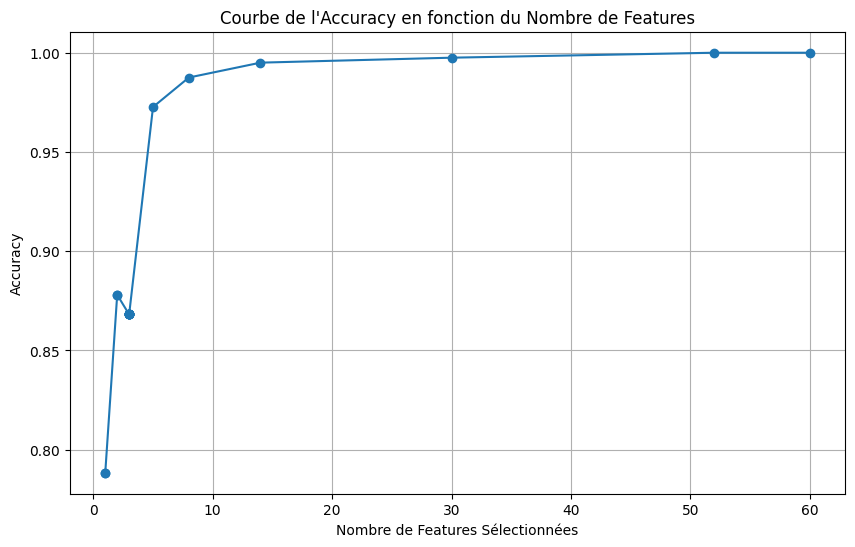

In [ ]:
# Définir une plage de seuils de variance
thresholds = np.arange(0.1, 9.5, 0.5)
best_threshold = 0
best_accuracy = 0
best_selected_features = None
accuracies = []
n_features = []

for threshold in thresholds:
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(X)
    selected_features = X.columns[selector.get_support()]

    if X_selected.shape[1] > 0:  # Vérifier si des variables ont été sélectionnées
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.5, random_state=42)
        model = LogisticRegression(max_iter=500)

        # Évaluer la précision avec validation croisée
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        mean_accuracy = cv_scores.mean()

        print(f"Threshold: {threshold:.2f} | Features: {len(selected_features)} | Accuracy: {mean_accuracy:.4f}")

        accuracies.append(mean_accuracy)
        n_features.append(len(selected_features))

# Tracer la courbe d'accuracy en fonction du nombre de features sélectionnées
plt.figure(figsize=(10, 6))
plt.plot(n_features, accuracies, marker='o', linestyle='-')
plt.xlabel('Nombre de Features Sélectionnées')
plt.ylabel('Accuracy')
plt.title("Courbe de l'Accuracy en fonction du Nombre de Features")
plt.grid()
plt.show()

* L'accuracy augmente rapidement avec le nombre de features, atteignant
presque 100 % autour de 10-15 gènes, puis se stabilise, indiquant qu'un petit sous-ensemble de gènes est suffisant pour une bonne classification.

* Application de Variance Threshold








In [ ]:
# Apply VarianceThreshold with threshold=1.10
selector = VarianceThreshold(threshold=1.10)
X_selected = selector.fit_transform(X)
X_selected = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])
X_selected

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,ANKRD40CL,RHBDL2,RNF43,TOR4A,PAQR5,ESRP1,SYTL2,CDHR2,CLIC5,GAL
0,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,6.350919,...,4.661474,4.407452,4.241267,5.535112,4.593671,6.423875,3.951686,3.500730,5.130743,1.830484
1,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,4.686086,...,3.482330,4.135014,4.002000,6.077375,4.929379,5.338636,4.269728,4.658790,5.438104,2.097157
2,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,4.281126,...,3.966393,3.057578,3.447174,4.480359,3.619404,6.820828,4.050933,5.649376,6.580938,3.890943
3,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,4.821072,...,3.519565,5.122664,3.655234,4.754134,3.867237,5.613117,4.357246,5.437107,4.615263,1.840902
4,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,5.181036,...,4.636635,4.000334,3.863294,5.575456,4.256689,7.095309,1.906739,6.286182,4.432410,3.506561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,6.019963,3.089364,4.393486,5.947781,7.124598,6.476207,3.511464,3.360520,2.954864,1.708999,...,1.272835,3.195294,3.521571,5.413717,1.968031,5.599669,3.845019,4.632634,4.571678,2.336317
800,3.691606,2.118164,4.794787,4.746829,5.493405,5.127365,3.516129,1.701237,2.771962,2.215480,...,0.817982,3.371146,2.456133,4.776319,2.498743,5.316327,3.309359,1.800088,1.340236,3.410137
801,3.035242,2.495383,4.438451,5.916828,7.155135,5.556266,1.192243,1.169104,1.038835,2.833854,...,1.663567,2.589240,2.159680,4.921439,2.019188,6.023908,2.081777,3.624820,2.806374,0.775487
802,3.021057,3.581192,4.822947,5.694947,6.789079,6.570513,1.404105,3.390414,2.653714,3.190606,...,3.249255,2.881079,6.272607,5.242025,2.810310,6.217973,2.137942,4.088197,3.426452,4.175287


Colonnes supprimées : {'SYTL2', 'NIBAN1', 'RHBDL2', 'UGP2', 'CLIC5', 'PAQR5', 'FABP1', 'RNF186', 'RNF43', 'IGLV8-61', 'DHRS11', 'FOXF2', 'TENT5C', 'CDHR2', 'ANKRD40CL', 'DAO', 'DDIT4', 'SLC7A5', 'SIAE'}


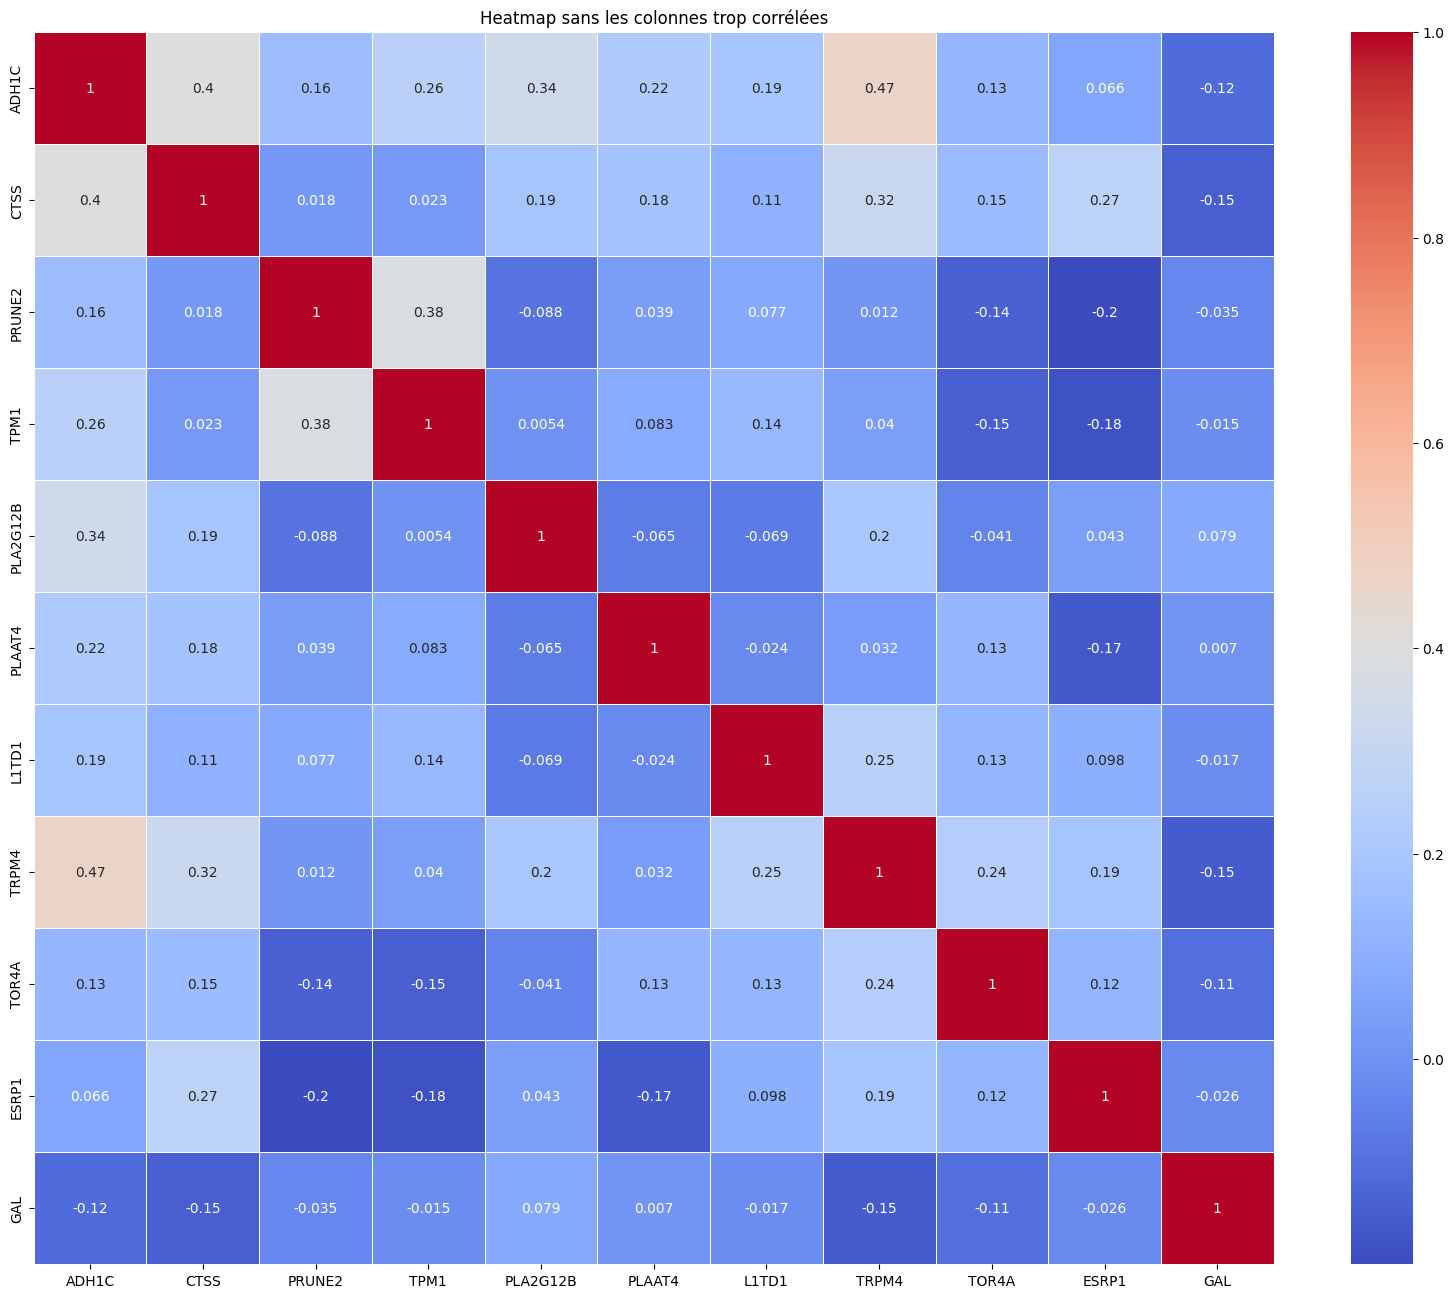

In [ ]:
# Convertir en DataFrame si nécessaire
X_selected_df = pd.DataFrame(X_selected)

# Calculer la matrice de corrélation
correlation_matrix = X_selected_df.corr()

# Définir le seuil de corrélation
correlation_threshold = 0.5

# Identifier les colonnes fortement corrélées (positivement ou négativement)
to_drop = set()

# Parcourir la matrice de corrélation
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[j]
            to_drop.add(colname)

# Supprimer les colonnes identifiées
X_selected_cleaned = X_selected_df.drop(columns=to_drop)

# Afficher les colonnes supprimées
print(f"Colonnes supprimées : {to_drop}")

# Visualiser la nouvelle matrice de corrélation
plt.figure(figsize=(20, 16))
sns.heatmap(X_selected_cleaned.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap sans les colonnes trop corrélées')
plt.show()


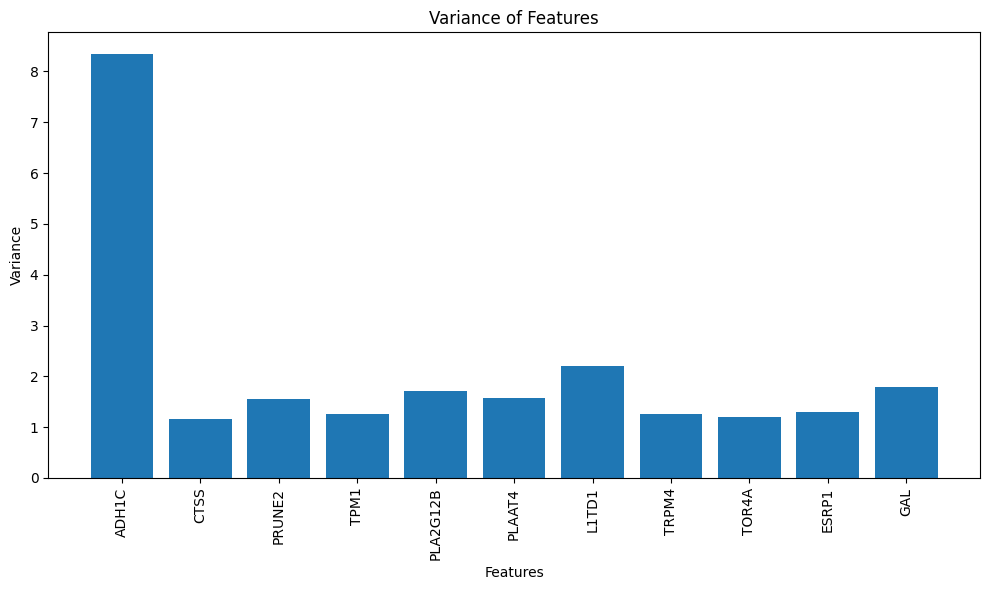

In [ ]:
# Calculate feature variances
feature_variances = X_selected_cleaned.var(axis=0)

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(feature_variances.index, feature_variances.values)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance of Features")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

* penalty='l2' : Ce paramètre spécifie le type de régularisation à utiliser. La régularisation aide à prévenir le surajustement en ajoutant une pénalité à la complexité du modèle. 'l2' fait référence à la régularisation L2, qui ajoute une pénalité proportionnelle au carré de l'amplitude des coefficients. Il s'agit du paramètre par défaut pour LogisticRegression.


* C=1.0 : Ce paramètre contrôle la force de la régularisation. C'est l'inverse de la force de régularisation ; une valeur plus petite signifie une régularisation plus forte. Dans ce cas, il est défini sur 1.0, indiquant une force de régularisation modérée.

In [ ]:
# Split data into training and testing sets
X_train_var, X_test_var, y_train_var, y_test_var = train_test_split(X_selected_cleaned, y, test_size=0.25, random_state=42)

**2. Application de la logistic regression sur un Dataset avec Sélection des Colonnes Pertinentes à l’aide de VarianceThreshold et correlation**


In [ ]:
# Train a logistic regression model_log
model_log = LogisticRegression(max_iter=1000, penalty='l2', C=1.0)  # Add regularization
model_log.fit(X_train_var, y_train_var)

# Evaluate training accuracy
train_accuracy_var = model_log.score(X_train_var, y_train_var)
print(f"Training accuracy: {train_accuracy_var:.4f}")

# Evaluate testing accuracy
test_accuracy_var = model_log.score(X_test_var, y_test_var)
print(f"Testing accuracy: {test_accuracy_var:.4f}")

Training accuracy: 0.9403
Testing accuracy: 0.9254


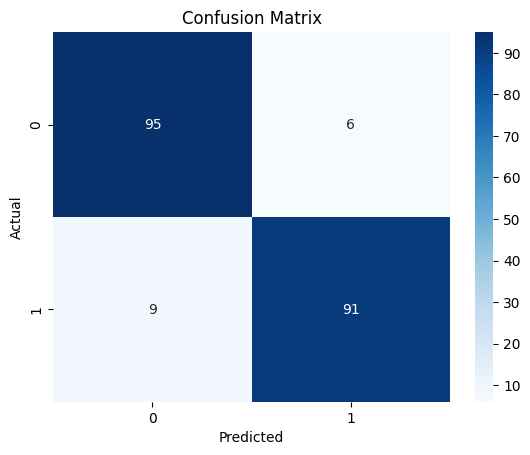

In [ ]:
y_pred_var = model_log.predict(X_test_var)
cm_var = confusion_matrix(y_test_var, y_pred_var)


# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(cm_var, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calcul des métriques
precision_var = precision_score(y_test_var, y_pred_var, average='weighted')
recall_var = recall_score(y_test_var, y_pred_var, average='weighted')
f1_var = f1_score(y_test_var, y_pred_var, average='weighted')

print(f"Précision : {precision_var:.4f}")
print(f"Rappel : {recall_var:.4f}")
print(f"F1-Score : {f1_var:.4f}")

Précision : 0.9257
Rappel : 0.9254
F1-Score : 0.9254


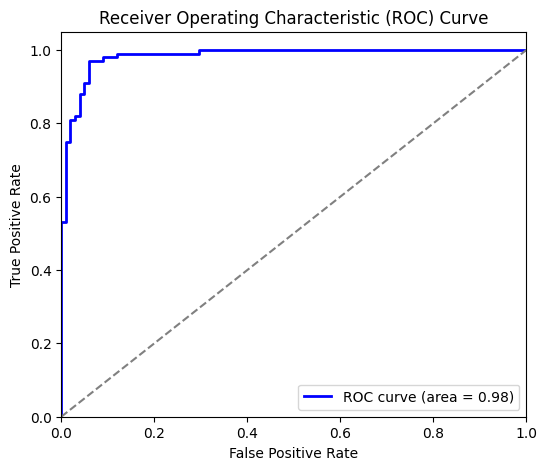

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Calcul et affichage de la courbe ROC
y_proba_var = model_log.predict_proba(X_test_var)[:, 1]  # Probabilités pour la classe positive
fpr, tpr, _ = roc_curve(y_test_var, y_proba_var)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


3. Validation croisée avec sélection des caractéristiques :


In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_selected_cleaned, y, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}")

Cross-validation accuracy: 0.9341 +/- 0.0224


**2. Application de la KNN sur un Dataset avec Sélection des Colonnes Pertinentes à l’aide de VarianceThreshold et correlation**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Train a KNN model_knn with k=5 (you can adjust this)
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train_var, y_train_var)

# Evaluate training accuracy
train_accuracy_var = model_knn.score(X_train_var, y_train_var)
print(f"Training accuracy: {train_accuracy_var:.4f}")

# Evaluate testing accuracy
test_accuracy_var = model_knn.score(X_test_var, y_test_var)
print(f"Testing accuracy: {test_accuracy_var:.4f}")

Training accuracy: 0.9602
Testing accuracy: 0.9701


In [ ]:
# Make predictions on the test set
y_pred_var_knn = model_knn.predict(X_test_var)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_var, y_pred_var_knn)
precision = precision_score(y_test_var, y_pred_var_knn)
recall = recall_score(y_test_var, y_pred_var_knn)
f1 = f1_score(y_test_var, y_pred_var_knn)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9701
Precision: 0.9519
Recall: 0.9900
F1-Score: 0.9706


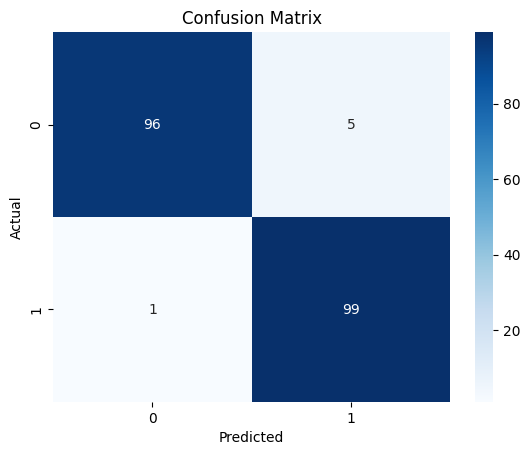

In [ ]:
cm_var_knn = confusion_matrix(y_test_var, y_pred_var_knn)


# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(cm_var_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Optimal k: 6


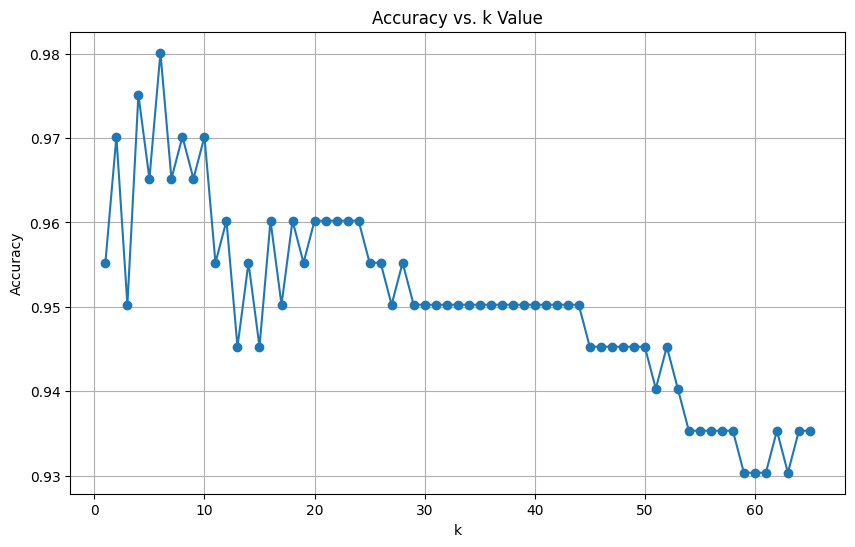

In [ ]:
# Range of k values to test
k_values = range(1,66)  # You can adjust the range

# List to store accuracy scores
accuracy_scores = []

# Iterate through each k value
for k in k_values:
    # Create and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_var, y_train_var)

    # Make predictions on the test set
    y_pred = knn.predict(X_test_var)

    # Calculate and store the accuracy score
    accuracy = accuracy_score(y_test_var, y_pred)
    accuracy_scores.append(accuracy)

# Find the optimal k with the highest accuracy score
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Optimal k: {optimal_k}")

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. k Value')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

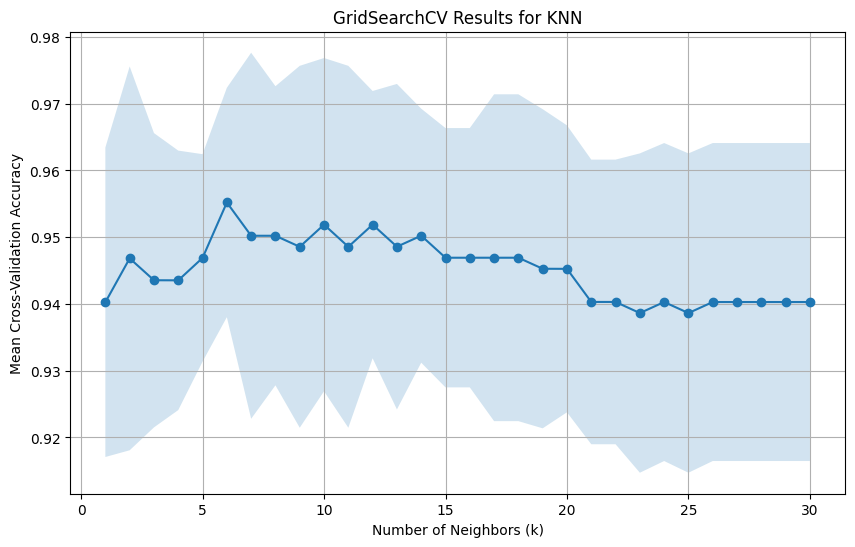

Best hyperparameters: {'n_neighbors': 6}
Best cross-validation score: 0.955206611570248
Execution time: 3.198450803756714 seconds


In [ ]:
import time
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 31)}  # Test k values from 1 to 30

# Create the KNN model
knn = KNeighborsClassifier()

# Record the start time
start_time = time.time()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_var, y_train_var)

# Record the end time and calculate execution time
end_time = time.time()
execution_time = end_time - start_time

# Get the results
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], mean_scores, marker='o', linestyle='-')
plt.fill_between(param_grid['n_neighbors'], mean_scores - std_scores, mean_scores + std_scores, alpha=0.2)
plt.title('GridSearchCV Results for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

# Print the best hyperparameters, score, and execution time
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
print("Execution time:", execution_time, "seconds")

In [ ]:
# Train a KNN model_knn with k=6 (you can adjust this)
model_knn = KNeighborsClassifier(n_neighbors=6)
model_knn.fit(X_train_var, y_train_var)

# Evaluate training accuracy
train_accuracy_var = model_knn.score(X_train_var, y_train_var)
print(f"Training accuracy: {train_accuracy_var:.4f}")

# Evaluate testing accuracy
test_accuracy_var = model_knn.score(X_test_var, y_test_var)
print(f"Testing accuracy: {test_accuracy_var:.4f}")

Training accuracy: 0.9585
Testing accuracy: 0.9801




**Ajout de bruit: pour le model KNN et logistic regression**
* L'ajout de bruit permet d'évaluer la robustesse du modèle. Si la précision chute fortement après l'ajout de bruit, cela signifie que le modèle dépend trop des caractéristiques originales et peut manquer de généralisation.

In [ ]:
# Ajouter du bruit aux features
X_noisy_log_var = X_selected_cleaned + np.random.normal(0, 2, X_selected_cleaned.shape)
X_noisy_log_var

,ADH1C,CTSS,PRUNE2,TPM1,PLA2G12B,PLAAT4,L1TD1,TRPM4,TOR4A,ESRP1,GAL
0,10.375621,7.980698,-1.463525,5.966064,4.045219,7.882243,1.201430,8.574559,4.015884,9.713113,-0.542790
1,9.116842,4.908713,5.919476,10.009878,3.640672,5.441739,2.338540,6.940146,9.750461,4.195491,4.361591
2,11.304923,6.593240,1.804090,5.595516,5.819103,8.275657,1.099574,8.273601,5.633978,8.182466,2.916589
3,7.782150,5.274276,4.954682,8.465994,2.368943,5.083430,7.486024,3.550142,4.107773,5.291142,0.386965
4,5.371998,6.207099,1.686654,11.130252,3.420958,6.059597,1.674160,5.892486,3.334585,3.679042,8.306773
...,...,...,...,...,...,...,...,...,...,...,...
799,8.908919,9.475660,4.099543,6.589830,-0.099569,7.621099,-0.193815,5.623570,5.978327,4.708346,1.740168
800,2.751871,5.579398,1.517016,6.189368,0.263555,12.081033,0.577620,3.775472,7.873005,3.463674,3.437804
801,7.334012,10.061473,3.951644,3.681929,1.678615,2.239189,-1.443025,5.141443,7.731485,7.283404,1.173931
802,4.619450,5.525144,7.544783,3.095910,3.498008,2.159767,2.436820,2.590474,5.131970,5.161296,3.808466


In [ ]:
# Re-diviser en train/test
X_trainB_var, X_testB_var, y_trainB_var, y_testB_var = train_test_split(X_noisy_log_var, y, test_size=0.25, random_state=42)

* **pour logistic regression**




In [ ]:
# Ré-entraîner et tester
model_log.fit(X_trainB_var, y_trainB_var)
y_predB_var = model_log.predict(X_testB_var)
accuracyB = accuracy_score(y_testB_var, y_predB_var)

# Évaluer la précision sur les données d'entraînement
train_accuracyBruit = model_log.score(X_trainB_var, y_trainB_var)
test_accuracyBruit = model_log.score(X_testB_var, y_testB_var)

print(f"Précision sur les données d'entraînement : {train_accuracyBruit:.4f}")
print(f"Précision sur les données de test : {test_accuracyBruit:.4f}")

Précision sur les données d'entraînement : 0.8375
Précision sur les données de test : 0.7662


* **pour le model knn**

In [ ]:
# Train a KNN model with k=5 (you can adjust this)
model_knn = KNeighborsClassifier(n_neighbors=6)
model_knn.fit(X_trainB_var, y_trainB_var)

# Evaluate training accuracy
train_accuracy_varB = model_knn.score(X_trainB_var, y_trainB_var)
print(f"Précision sur les données d'entraînement: {train_accuracy_varB:.4f}")

# Evaluate testing accuracy
test_accuracy_varB = model_knn.score(X_testB_var, y_testB_var)
print(f"Précision sur les données de test: {test_accuracy_varB:.4f}")

Précision sur les données d'entraînement: 0.8425
Précision sur les données de test: 0.7313


Optimal k: 24


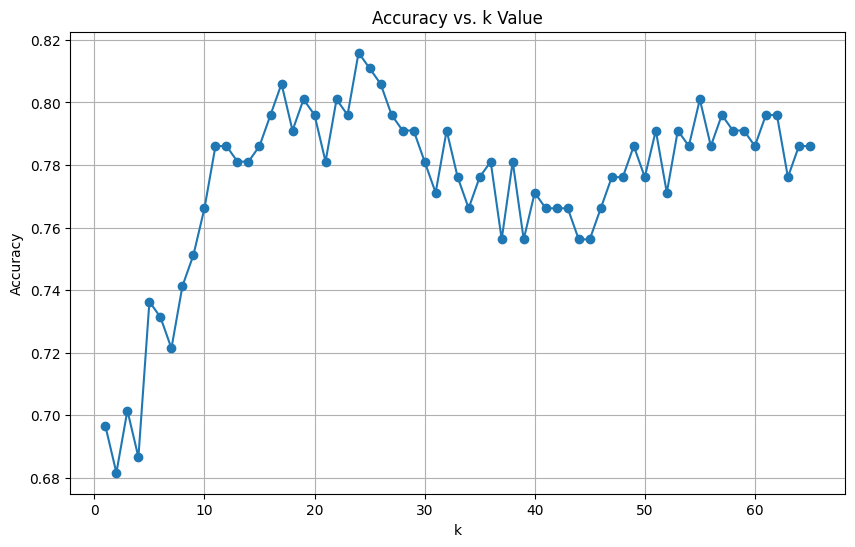

In [ ]:
# Range of k values to test
k_values = range(1,66)  # You can adjust the range

# List to store accuracy scores
accuracy_scores = []

# Iterate through each k value
for k in k_values:
    # Create and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_trainB_var, y_trainB_var)

    # Make predictions on the test set
    y_pred = knn.predict(X_testB_var)

    # Calculate and store the accuracy score
    accuracy = accuracy_score(y_testB_var, y_pred)
    accuracy_scores.append(accuracy)

# Find the optimal k with the highest accuracy score
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Optimal k: {optimal_k}")

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. k Value')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# Train a KNN model with k=5 (you can adjust this)
model_knn = KNeighborsClassifier(n_neighbors=34)
model_knn.fit(X_trainB_var, y_trainB_var)

# Evaluate training accuracy
train_accuracy_varB = model_knn.score(X_trainB_var, y_trainB_var)
print(f"Précision sur les données d'entraînement: {train_accuracy_varB:.4f}")

# Evaluate testing accuracy
test_accuracy_varB = model_knn.score(X_testB_var, y_testB_var)
print(f"Précision sur les données de test: {test_accuracy_varB:.4f}")

Précision sur les données d'entraînement: 0.8425
Précision sur les données de test: 0.7662


***2. Methode de Recursive Feature Elimination (RFE)***

---

Le Recursive Feature Elimination (RFE) est une méthode de sélection de caractéristiques qui élimine progressivement les moins importantes en fonction d'un modèle d'apprentissage. Voici un code Python utilisant Scikit-learn pour appliquer RFE avec un modèle de régression logistique (pour la classification) ou une régression linéaire (pour la régression).


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Modèle de base
model = LogisticRegression()

# Application de RFE (choix des 5 meilleures features)
rfe = RFE(model, n_features_to_select=5)
X_selected = rfe.fit_transform(X, y)

# Récupération des noms des colonnes sélectionnées
selected_features = X.columns[rfe.support_]
print("Caractéristiques sélectionnées :", selected_features)

X_selected_rfe = pd.DataFrame(X_selected, columns=selected_features)
X_selected_rfe

Caractéristiques sélectionnées : Index(['UGP2', 'SLC7A5', 'FOXF2', 'NEURL1B', 'RNF43'], dtype='object')


,UGP2,SLC7A5,FOXF2,NEURL1B,RNF43
0,7.062512,3.864253,3.028995,4.914704,4.241267
1,6.318818,3.069581,2.984629,4.736504,4.002000
2,6.917742,3.188257,2.929762,4.996818,3.447174
3,7.081085,2.357523,3.313829,5.100944,3.655234
4,5.937685,4.137667,4.191695,5.231102,3.863294
...,...,...,...,...,...
799,4.393486,5.947781,2.954864,5.540152,3.521571
800,4.794787,4.746829,2.771962,3.787075,2.456133
801,4.438451,5.916828,1.038835,3.377243,2.159680
802,4.822947,5.694947,2.653714,3.493418,6.272607


In [595]:
# Re-diviser en train/test
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_selected_rfe, y, test_size=0.25, random_state=42)

* **pour logistic regression**

In [596]:
# Ré-entraîner et tester
model_log.fit(X_train_rfe, y_train_rfe)
y_pred_rfe = model_log.predict(X_test_rfe)
accuracyB = accuracy_score(y_test_rfe, y_pred_rfe)

# Évaluer la précision sur les données d'entraînement
train_accuracyBruit = model_log.score(X_train_rfe, y_train_rfe)
test_accuracyBruit = model_log.score(X_test_rfe, y_test_rfe)

print(f"Précision sur les données d'entraînement : {train_accuracyBruit:.4f}")
print(f"Précision sur les données de test : {test_accuracyBruit:.4f}")

Précision sur les données d'entraînement : 1.0000
Précision sur les données de test : 1.0000


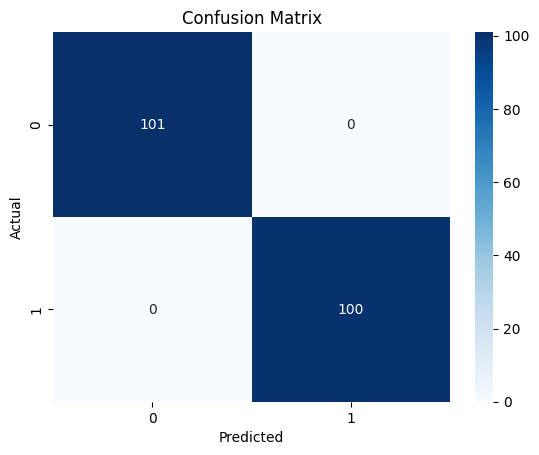

In [597]:
y_pred_rfe = model_log.predict(X_test_rfe)
cm_rfe = confusion_matrix(y_test_rfe, y_pred_rfe)


# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(cm_rfe, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [598]:
# Calcul des métriques
precision_rfe = precision_score(y_test_rfe, y_pred_rfe, average='weighted')
recall_rfe = recall_score(y_test_rfe, y_pred_rfe, average='weighted')
f1_rfe = f1_score(y_test_rfe, y_pred_rfe, average='weighted')

print(f"Précision : {precision_rfe:.4f}")
print(f"Rappel : {recall_rfe:.4f}")
print(f"F1-Score : {f1_rfe:.4f}")

Précision : 1.0000
Rappel : 1.0000
F1-Score : 1.0000


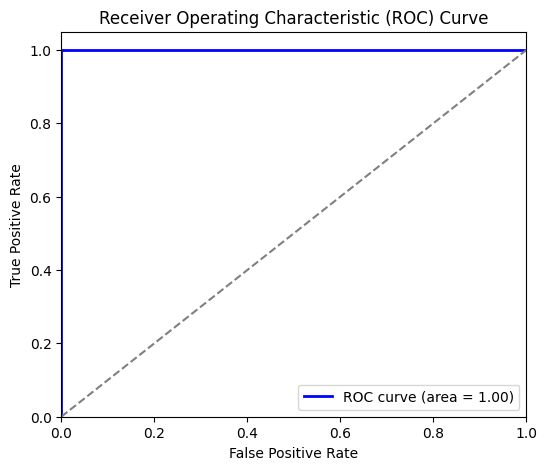

In [599]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Calcul et affichage de la courbe ROC
y_proba_rfe = model_log.predict_proba(X_test_rfe)[:, 1]  # Probabilités pour la classe positive
fpr, tpr, _ = roc_curve(y_test_rfe, y_proba_rfe)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**2. Application de la KNN sur un Dataset avec Sélection des Colonnes Pertinentes à l’aide Le Recursive Feature Elimination (RFE)**


In [600]:
# Train a KNN model_knn with k=5 (you can adjust this)
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train_rfe, y_train_rfe)

# Evaluate training accuracy
train_accuracy_rfe = model_knn.score(X_train_rfe, y_train_rfe)
print(f"Training accuracy: {train_accuracy_rfe:.4f}")

# Evaluate testing accuracy
test_accuracy_rfe = model_knn.score(X_test_rfe, y_test_rfe)
print(f"Testing accuracy: {test_accuracy_rfe:.4f}")

Training accuracy: 0.9950
Testing accuracy: 1.0000


In [601]:
# Make predictions on the test set
y_pred_rfe_knn = model_knn.predict(X_test_rfe)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_rfe, y_pred_rfe_knn)
precision = precision_score(y_test_rfe, y_pred_rfe_knn)
recall = recall_score(y_test_rfe, y_pred_rfe_knn)
f1 = f1_score(y_test_rfe, y_pred_rfe_knn)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


Optimal k: 1


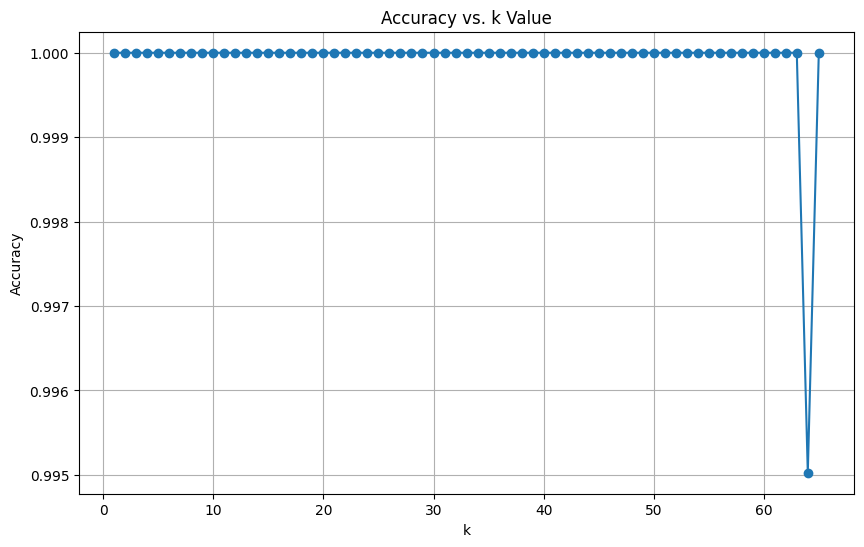

In [602]:
# Range of k values to test
k_values = range(1,66)  # You can adjust the range

# List to store accuracy scores
accuracy_scores = []

# Iterate through each k value
for k in k_values:
    # Create and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_rfe, y_train_rfe)

    # Make predictions on the test set
    y_pred = knn.predict(X_test_rfe)

    # Calculate and store the accuracy score
    accuracy = accuracy_score(y_test_rfe, y_pred)
    accuracy_scores.append(accuracy)

# Find the optimal k with the highest accuracy score
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Optimal k: {optimal_k}")

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. k Value')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

**Ajout de bruit: pour le model KNN et logistic regression dans le cas suivante Le Recursive Feature Elimination (RFE)**

In [604]:
# Ajouter du bruit aux features
X_noisy_log_rfe = X_selected_rfe + np.random.normal(0, 2, X_selected_rfe.shape)
X_noisy_log_rfe

,UGP2,SLC7A5,FOXF2,NEURL1B,RNF43
0,12.930552,6.068448,4.340291,6.284229,4.026795
1,6.186412,0.100386,1.738721,5.187487,1.281724
2,7.133869,1.124136,3.125448,5.596951,2.301837
3,8.170126,-0.376051,-2.045463,4.990127,2.671297
4,4.551437,0.259818,2.577741,5.614041,3.177520
...,...,...,...,...,...
799,6.063484,6.993378,2.498920,8.846731,3.619034
800,6.744867,7.682446,2.782065,5.520585,2.886174
801,4.276341,4.520966,2.305827,2.731308,4.542798
802,6.447174,4.382574,3.119364,2.698990,4.487157


In [605]:
# Re-diviser en train/test
X_trainB_rfe, X_testB_rfe, y_trainB_rfe, y_testB_rfe = train_test_split(X_noisy_log_rfe, y, test_size=0.25, random_state=42)

* **pour logistic regression**




Précision sur les données d'entraînement (avec bruit et RFE): 0.8557
Précision sur les données de test (avec bruit et RFE): 0.8557
Precision (avec bruit et RFE): 0.8515
Recall (avec bruit et RFE): 0.8600
F1-score (avec bruit et RFE): 0.8557


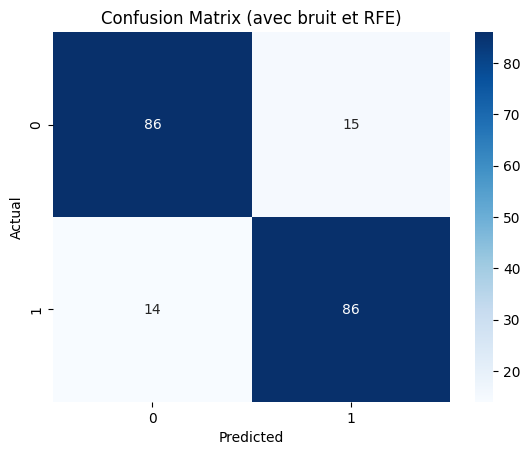

In [618]:
# Ré-entraîner et tester
model_log.fit(X_trainB_rfe, y_trainB_rfe)
y_predB_rfe = model_log.predict(X_testB_rfe)
accuracy_noisy_rfe = accuracy_score(y_testB_rfe, y_predB_rfe)

# Évaluer la précision sur les données d'entraînement
train_accuracy_noisy_rfe = model_log.score(X_trainB_rfe, y_trainB_rfe)
test_accuracy_noisy_rfe = model_log.score(X_testB_rfe, y_testB_rfe)

print(f"Précision sur les données d'entraînement (avec bruit et RFE): {train_accuracy_noisy_rfe:.4f}")
print(f"Précision sur les données de test (avec bruit et RFE): {test_accuracy_noisy_rfe:.4f}")

# Additional Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision_noisy_rfe = precision_score(y_testB_rfe, y_predB_rfe)
recall_noisy_rfe = recall_score(y_testB_rfe, y_predB_rfe)
f1_noisy_rfe = f1_score(y_testB_rfe, y_predB_rfe)

print(f"Precision (avec bruit et RFE): {precision_noisy_rfe:.4f}")
print(f"Recall (avec bruit et RFE): {recall_noisy_rfe:.4f}")
print(f"F1-score (avec bruit et RFE): {f1_noisy_rfe:.4f}")



cm_noisy_rfe = confusion_matrix(y_testB_rfe, y_predB_rfe)
sns.heatmap(cm_noisy_rfe, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (avec bruit et RFE)")
plt.show()

* **pour le model knn**

Précision sur les données d'entraînement (KNN, bruit, RFE): 0.8524
Précision sur les données de test (KNN, bruit, RFE): 0.8607
Accuracy (KNN, bruit, RFE): 0.8607
Precision (KNN, bruit, RFE): 0.8600
Recall (KNN, bruit, RFE): 0.8600
F1-score (KNN, bruit, RFE): 0.8600


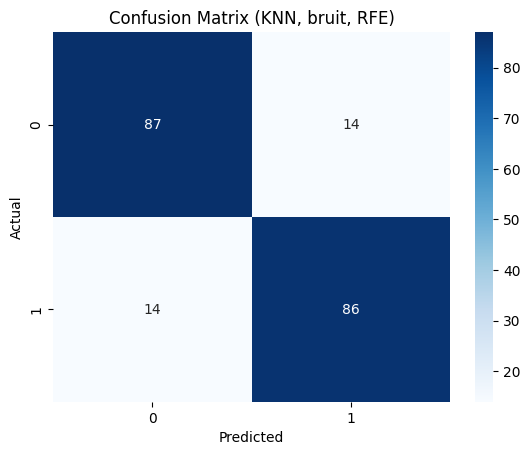

In [621]:
# Find the optimal k value (using GridSearchCV for example)
param_grid = {'n_neighbors': range(1, 31)}  # Adjust the range as needed
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_trainB_rfe, y_trainB_rfe)
optimal_k = grid_search.best_params_['n_neighbors']

# Train the KNN model with the optimal k
model_knn = KNeighborsClassifier(n_neighbors=optimal_k)
model_knn.fit(X_trainB_rfe, y_trainB_rfe)

# Evaluate training accuracy
train_accuracy_knn_noisy_rfe = model_knn.score(X_trainB_rfe, y_trainB_rfe)
print(f"Précision sur les données d'entraînement (KNN, bruit, RFE): {train_accuracy_knn_noisy_rfe:.4f}")

# Evaluate testing accuracy
test_accuracy_knn_noisy_rfe = model_knn.score(X_testB_rfe, y_testB_rfe)
print(f"Précision sur les données de test (KNN, bruit, RFE): {test_accuracy_knn_noisy_rfe:.4f}")

# Make predictions
y_pred_knn_noisy_rfe = model_knn.predict(X_testB_rfe)
accuracy_knn_noisy_rfe = accuracy_score(y_testB_rfe, y_pred_knn_noisy_rfe)
print(f"Accuracy (KNN, bruit, RFE): {accuracy_knn_noisy_rfe:.4f}")

# Calculate and print other metrics
precision_knn_noisy_rfe = precision_score(y_testB_rfe, y_pred_knn_noisy_rfe)
recall_knn_noisy_rfe = recall_score(y_testB_rfe, y_pred_knn_noisy_rfe)
f1_knn_noisy_rfe = f1_score(y_testB_rfe, y_pred_knn_noisy_rfe)

print(f"Precision (KNN, bruit, RFE): {precision_knn_noisy_rfe:.4f}")
print(f"Recall (KNN, bruit, RFE): {recall_knn_noisy_rfe:.4f}")
print(f"F1-score (KNN, bruit, RFE): {f1_knn_noisy_rfe:.4f}")

# Confusion matrix
cm_knn_noisy_rfe = confusion_matrix(y_testB_rfe, y_pred_knn_noisy_rfe)
sns.heatmap(cm_knn_noisy_rfe, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (KNN, bruit, RFE)")
plt.show()